In [362]:
#Librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [363]:
#Importacion de datos
archivo_excel="fuente_banco.xlsx"
hojas=pd.read_excel(archivo_excel,sheet_name=None)
hojas_cliente=pd.read_excel(archivo_excel,sheet_name='CLIENTE')
hojas_cc=pd.read_excel(archivo_excel,sheet_name='CC')
hojas_tarjetas=pd.read_excel(archivo_excel,sheet_name='TARJETA')
hojas_prestamos=pd.read_excel(archivo_excel,sheet_name='PRESTAMO')

In [364]:
hojas_cliente

,ID CLIENTE,FECHA NACIMIENTO,SEXO,CIUDAD,TRABAJO
0,1,1981-01-02,H,ASUNCION,La Productora SA
1,2,1987-01-20,M,ASUNCION,El Constructor SA
2,3,2000-03-17,M,ENCARNACION,Independiente
3,4,1980-11-13,H,ENCARNACION,Independiente
4,5,1994-01-07,H,CDE,Estancia San Luis
...,...,...,...,...,...
95,96,1974-01-07,M,san lorenzo,NaN
96,97,1992-07-30,M,fernando de la mora,Al por mayor SA
97,98,1970-12-25,H,FDO de la Mora,Al por mayor SA
98,99,1998-12-16,H,villarrica,NaN


In [365]:
hojas_cc

,ID CLIENTE,PERIODO,CTA,FECHA ALTA,SALDO FIN DE MES,DEBITOS,CREDITOS,SALDO PROMEDIO
0,1,2018-01-01,CC 3457 41,2001-02-22,8991176,64211,14429992,1124205
1,1,2018-02-01,CC 3457 41,2001-02-22,4518093,3639297,8723299,11045337
2,1,2018-03-01,CC 3457 41,2001-02-22,11315644,998543,3215480,10102681
3,1,2018-04-01,CC 3457 41,2001-02-22,2482457,2847372,4030145,9966983
4,1,2018-05-01,CC 3457 41,2001-02-22,8032000,1510007,7169478,3735998
...,...,...,...,...,...,...,...,...
2395,100,2019-08-01,CC 3457 4100,2002-01-15,3337520,1699030,8809435,4586652
2396,100,2019-09-01,CC 3457 4100,2002-01-15,8770548,8232594,7441437,3898866
2397,100,2019-10-01,CC 3457 4100,2002-01-15,4923389,1336173,580221,3840817
2398,100,2019-11-01,CC 3457 4100,2002-01-15,4580170,7360520,2107434,1138308


In [366]:
hojas_prestamos

,ID CLIENTE,ID PRESTAMO,FECHA ALTA,MONTO PRESTAMO,CANTIDAD CUOTA,CUOTA NRO,VALOR CUOTA,FECHA VENCIMIENTO,FECHA PAGO,IMPORTE PAGADO
0,1,PR 5547 51,2018-06-27,3087784,14,1,220556.000000,2018-08-26,2018-08-27,220556.000000
1,1,PR 5547 51,2018-06-27,3087784,14,2,220556.000000,2018-09-25,2018-09-19,220556.000000
2,1,PR 5547 51,2018-06-27,3087784,14,3,220556.000000,2018-10-25,2018-10-15,220556.000000
3,1,PR 5547 51,2018-06-27,3087784,14,4,220556.000000,2018-11-24,2018-11-28,220556.000000
4,1,PR 5547 51,2018-06-27,3087784,14,5,220556.000000,2018-12-24,2018-12-24,220556.000000
...,...,...,...,...,...,...,...,...,...,...
546,69,PR 5547 569,2017-05-31,7730512,14,10,552179.428571,2018-04-26,2018-04-19,552179.428571
547,69,PR 5547 569,2017-05-31,7730512,14,11,552179.428571,2018-05-26,2018-05-17,552179.428571
548,69,PR 5547 569,2017-05-31,7730512,14,12,552179.428571,2018-06-25,2018-06-16,552179.428571
549,69,PR 5547 569,2017-05-31,7730512,14,13,552179.428571,2018-07-25,2018-08-04,552179.428571


In [367]:
hojas_tarjetas

,ID CLIENTE,PERIODO,ID TARJETA,FECHA ALTA,LIMITE,COMPRA,DEUDA,SALDO,PAGO MINIMO,FECHA VENCIMIENTO,FECHA PAGO,MONTO PAGO
0,1,2018-01-01,TC 5547 51,2011-01-31,2107553,2003369,0,1732570,200336.9,2018-01-10,2018-01-11,270799
1,1,2018-02-01,TC 5547 51,2011-01-31,2107553,282418,2014988,10557,201498.8,2018-02-10,2018-02-10,2004431
2,1,2018-03-01,TC 5547 51,2011-01-31,2107553,880786,891343,146776,89134.3,2018-03-10,2018-03-03,744567
3,1,2018-04-01,TC 5547 51,2011-01-31,2107553,124787,271563,141961,27156.3,2018-04-10,2018-04-11,129602
4,1,2018-05-01,TC 5547 51,2011-01-31,2107553,305671,447632,353524,44763.2,2018-05-10,2018-05-01,94108
...,...,...,...,...,...,...,...,...,...,...,...,...
523,64,2019-08-01,TC 5547 564,2017-04-14,3216160,2193122,3194639,2598720,319463.9,2019-08-10,2019-07-31,595919
524,64,2019-09-01,TC 5547 564,2017-04-14,3216160,34415,2633135,685640,263313.5,2019-09-10,2019-09-06,1947495
525,64,2019-10-01,TC 5547 564,2017-04-14,3216160,1770588,2456228,463612,245622.8,2019-10-10,2019-10-03,1992616
526,64,2019-11-01,TC 5547 564,2017-04-14,3216160,776746,1240358,727970,124035.8,2019-11-10,2019-11-05,512388


In [368]:
# 1. Cálculo de Recencia para cada cliente, para este calculo tenemos en cuenta cuando saco su cc, cuando saco su tc y cuando saco su ultimo prestamo
recencia_cc = hojas_cc['FECHA ALTA'].max() -  hojas_cc.groupby('ID CLIENTE')['FECHA ALTA'].min()
recencia_tarjetas = hojas_tarjetas['FECHA PAGO'].max()  - hojas_tarjetas.groupby('ID CLIENTE')['FECHA PAGO'].max()
recencia_prestamos = hojas_prestamos['FECHA PAGO'].max()   - hojas_prestamos.groupby('ID CLIENTE')['FECHA PAGO'].max()
recencia = pd.concat([recencia_cc, recencia_tarjetas, recencia_prestamos], axis=1).min(axis=1)

In [369]:
promedio_debito=hojas_cc['DEBITOS'].mean()
promedio_credito=hojas_cc['CREDITOS'].mean()
promedio_fin_mes=hojas_cc['SALDO FIN DE MES'].mean()
promedio_saldo_promedio=hojas_cc['SALDO PROMEDIO'].mean()
debitos_altos = hojas_cc[hojas_cc['DEBITOS'] >= promedio_debito]
credito_atos=hojas_cc[hojas_cc['CREDITOS']>=promedio_credito]
fin_alto=hojas_cc[hojas_cc['SALDO FIN DE MES']>=promedio_fin_mes]
saldo_promedio_alto=hojas_cc[hojas_cc['SALDO PROMEDIO']>=promedio_saldo_promedio]
veces_debito_alto_por_cliente = debitos_altos.groupby('ID CLIENTE').size()
veces_credito_alto_por_cliente=credito_atos.groupby('ID CLIENTE').size()
veces_fin_ato_por_cliente=fin_alto.groupby('ID CLIENTE').size()
veces_saldo_promedio_por_cliente=saldo_promedio_alto.groupby('ID CLIENTE').size()
frecuencia=veces_debito_alto_por_cliente.add(veces_credito_alto_por_cliente+veces_fin_ato_por_cliente+veces_saldo_promedio_por_cliente,fill_value=0)

In [370]:
monetario_cc = hojas_cc.groupby('ID CLIENTE')['SALDO PROMEDIO'].sum()
monetario_cc_r=hojas_cc.groupby('ID CLIENTE').size()
saldo_promedio_cliente=monetario_cc /monetario_cc_r
monetario_tc_compra=hojas_tarjetas.groupby('ID CLIENTE')['COMPRA'].mean()
monetario_tc_pago=hojas_tarjetas.groupby('ID CLIENTE')['MONTO PAGO'].mean()
monetario_prestamo=hojas_prestamos.groupby('ID CLIENTE')['MONTO PRESTAMO'].mean()
indice_clientes = range(1, 101)
monetario_tc_compra = monetario_tc_compra.reindex(indice_clientes, fill_value=0)
monetario_tc_pago = monetario_tc_pago.reindex(indice_clientes, fill_value=0)
monetario_prestamo = monetario_prestamo.reindex(indice_clientes, fill_value=0)
monetario = saldo_promedio_cliente + monetario_tc_compra + monetario_tc_pago + monetario_prestamo

In [371]:
RFM=pd.concat([recencia,frecuencia,monetario],axis=1)
RFM.columns=['Recencia','Frecuencia','Monetario']
RFM['Recencia'] = RFM['Recencia'].dt.days
RFM


,Recencia,Frecuencia,Monetario
ID CLIENTE,,,
1,0,47,1.046040e+07
2,4697,52,5.517583e+06
3,1249,54,9.597872e+06
4,4,43,1.208438e+07
5,697,44,2.482896e+07
...,...,...,...
96,3164,38,5.007938e+06
97,83,39,6.243921e+06
98,1177,51,5.821913e+06


In [372]:
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

In [373]:
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

In [374]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Grupos"]=(kmeans.labels_+1)

In [375]:
group = RFM.groupby(["Grupos"])[["Recencia", "Frecuencia","Monetario"]].mean()
group

,Recencia,Frecuencia,Monetario
Grupos,,,
1,340.117647,44.470588,1.804187e+07
2,4553.965517,46.310345,5.863005e+06
3,945.270270,50.135135,8.961396e+06


Text(0, 0.5, 'Monetario')

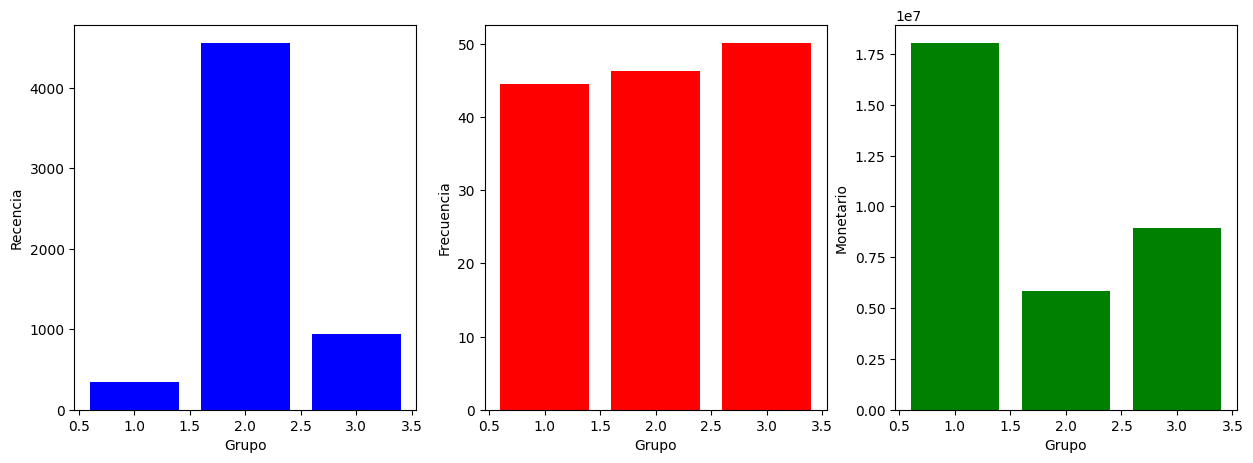

In [376]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.bar(data=group, x=group.index, height='Recencia', color='blue')
ax1.set_xlabel("Grupo")
ax1.set_ylabel("Recencia")
ax2.bar(data=group, x=group.index, height='Frecuencia', color='red')
ax2.set_xlabel("Grupo")
ax2.set_ylabel("Frecuencia")
ax3.bar(data=group, x=group.index, height='Monetario', color='green')
ax3.set_xlabel("Grupo")
ax3.set_ylabel("Monetario")

In [377]:
def func(row):
    return

In [378]:
Valores=RFM['Recencia'].describe(percentiles=[.2, .4, .6,.8])
Valores

count     100.000000
mean     1786.040000
std      1981.004046
min         0.000000
20%        16.800000
40%       567.200000
50%       844.000000
60%      1337.800000
80%      3897.600000
max      6347.000000
Name: Recencia, dtype: float64

In [379]:
def funcion_recencia(x,v1,v2,v3,v4):
    if x>=v1:
        return '1'
    elif x<v1 and x>=v2:
        return '2'
    elif x<v2 and x>=v3:
        return '3'
    elif x<v3 and x>=v4:
        return '4'
    else:
        return '5'    

In [380]:
def funcion(x,v1,v2,v3,v4):
    if x>=v1:
        return '5'
    elif x<v1 and x>=v2:
        return '4'
    elif x<v2 and x>=v3:
        return '3'
    elif x<v3 and x>=v4:
        return '2'
    else:
        return '1'   

In [381]:
v1=RFM['Recencia'].quantile(0.8)
v2=RFM['Recencia'].quantile(0.6)
v3=RFM['Recencia'].quantile(0.4)
v4=RFM['Recencia'].quantile(0.2)
RFM['Resultado_Recencia']=RFM.apply(lambda x:funcion_recencia(x['Recencia'],v1,v2,v3,v4),axis="columns")
RFM

,Recencia,Frecuencia,Monetario,Grupos,Resultado_Recencia
ID CLIENTE,,,,,
1,0,47,1.046040e+07,3,5
2,4697,52,5.517583e+06,2,1
3,1249,54,9.597872e+06,3,3
4,4,43,1.208438e+07,1,5
5,697,44,2.482896e+07,1,3
...,...,...,...,...,...
96,3164,38,5.007938e+06,2,2
97,83,39,6.243921e+06,1,4
98,1177,51,5.821913e+06,3,3


In [382]:
v1=RFM['Frecuencia'].quantile(0.8)
v2=RFM['Frecuencia'].quantile(0.6)
v3=RFM['Frecuencia'].quantile(0.4)
v4=RFM['Frecuencia'].quantile(0.2)
RFM['Resultado_Frecuencia']=RFM.apply(lambda x:funcion(x['Frecuencia'],v1,v2,v3,v4),axis="columns")
RFM

,Recencia,Frecuencia,Monetario,Grupos,Resultado_Recencia,Resultado_Frecuencia
ID CLIENTE,,,,,,
1,0,47,1.046040e+07,3,5,3
2,4697,52,5.517583e+06,2,1,5
3,1249,54,9.597872e+06,3,3,5
4,4,43,1.208438e+07,1,5,2
5,697,44,2.482896e+07,1,3,2
...,...,...,...,...,...,...
96,3164,38,5.007938e+06,2,2,1
97,83,39,6.243921e+06,1,4,1
98,1177,51,5.821913e+06,3,3,5


In [383]:
v1=RFM['Monetario'].quantile(0.8)
v2=RFM['Monetario'].quantile(0.6)
v3=RFM['Monetario'].quantile(0.4)
v4=RFM['Monetario'].quantile(0.2)
RFM['Resultado_Monetario']=RFM.apply(lambda x:funcion(x['Monetario'],v1,v2,v3,v4),axis="columns")
RFM

,Recencia,Frecuencia,Monetario,Grupos,Resultado_Recencia,Resultado_Frecuencia,Resultado_Monetario
ID CLIENTE,,,,,,,
1,0,47,1.046040e+07,3,5,3,4
2,4697,52,5.517583e+06,2,1,5,1
3,1249,54,9.597872e+06,3,3,5,4
4,4,43,1.208438e+07,1,5,2,4
5,697,44,2.482896e+07,1,3,2,5
...,...,...,...,...,...,...,...
96,3164,38,5.007938e+06,2,2,1,1
97,83,39,6.243921e+06,1,4,1,2
98,1177,51,5.821913e+06,3,3,5,2


In [384]:
RFM['Resultado RFM']=RFM['Resultado_Recencia']+RFM['Resultado_Frecuencia']+RFM['Resultado_Monetario']
RFM

,Recencia,Frecuencia,Monetario,Grupos,Resultado_Recencia,Resultado_Frecuencia,Resultado_Monetario,Resultado RFM
ID CLIENTE,,,,,,,,
1,0,47,1.046040e+07,3,5,3,4,534
2,4697,52,5.517583e+06,2,1,5,1,151
3,1249,54,9.597872e+06,3,3,5,4,354
4,4,43,1.208438e+07,1,5,2,4,524
5,697,44,2.482896e+07,1,3,2,5,325
...,...,...,...,...,...,...,...,...
96,3164,38,5.007938e+06,2,2,1,1,211
97,83,39,6.243921e+06,1,4,1,2,412
98,1177,51,5.821913e+06,3,3,5,2,352


<table>
<thead>
<tr>
<th style="background-color: #0163ea; color: white;"><b>Segmento de clientes</b></th>
<th style="background-color: #0163ea; color: white;"><b>RFM</b></th>
<th style="background-color: #0163ea; color: white;"><b>Comportamiento</b></th>
<th style="background-color: #0163ea; color: white;"><b>Estrategias accionables</b></th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Champions</b></td>
<td>555, 554, 544, 545, 454, 455, 445.</td>
<td>Compraron recientemente, suelen comprar con frecuencia y son los que más dinero gastan.</td>
<td>Recompénsalos. Pueden ser early adopters para nuevos productos. Son tus embajadores de marca.</td>
</tr>
<tr>
<td><b>Loyal customer</b></td>
<td>543, 444, 435, 355, 354, 345, 344, 335.</td>
<td>Gastan bastante dinero y con cierta frecuencia en tu eCommerce. Son sensibles a promociones.</td>
<td>Haz upselling con ellos. Ofréceles productos de más valor. Pídeles que dejen reviews. Fidelízalos.</td>
</tr>
<tr>
<td><b>Potential Loyalist</b></td>
<td>553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323.</td>
<td>Clientes recientes que gastaron una buena cantidad y compraron más de una vez.</td>
<td>Ofréceles un membership o programa de fidelización, recomiéndales otros productos.</td>
</tr>
<tr>
<td><b>New Customers</b></td>
<td>512, 511, 422, 421 412, 411, 311.</td>
<td>Han comprado recientemente, pero no compran a menudo.</td>
<td>Dales soporte para su on-boarding, haz que sientan que consiguen lo que buscan, comienza a construir una relación de confianza con ellos.</td>
</tr>
<tr>
<td><b>Promising</b></td>
<td>525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313.</td>
<td>Han comprado recientemente, pero no han gastado mucho.</td>
<td>Crea brand awareness, ofréceles descuentos, regalos o free trials.</td>
</tr>
<tr>
<td><b>Need Attention</b></td>
<td>535, 534, 443, 434, 343, 334, 325, 324.</td>
<td>Están por encima de la media en recencia, frecuencia y valor monetario, pero no han comprado recientemente.</td>
<td>Lanza ofertas limitadas en el tiempo y recomendaciones basadas en sus anteriores compras. Reactívalos.</td>
</tr>
<tr>
<td><b>Cannot Lose Them</b></td>
<td>155, 154, 144, 214,215,115, 114, 113 .</td>
<td>Hicieron las compras más grandes, y a menudo. Pero no han vuelto a tu eCommerce desde hace mucho tiempo.</td>
<td>Tráelos de vuelta con lanzamientos de nuevos productos, no dejes que se los lleve la competencia, habla con ellos.</td>
</tr>
<tr>
<td><b>About to sleep</b></td>
<td>331, 321, 312, 221, 213.</td>
<td>Por debajo de la media en recencia, frecuencia y valor monetario. Vas a perderlos si no los reactivas.</td>
<td>Comparte con ellos recursos de valor, recomiéndales productos populares, nuevos descuentos, etc. Reconecta con ellos.</td>
</tr>
<tr>
<td><b>At risk</b></td>
<td>255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124.</td>
<td>Gastaron mucho dinero y compraron con frecuencia, pero hace ya mucho tiempo de eso. ¡Necesitan que los traigas de vuelta!</td>
<td>Envíales emails personalizados para reconectar, ofréceles promociones&nbsp; y pon a su alcance recursos de valor.</td>
</tr>
<tr>
<td><b>Hibernating</b></td>
<td>332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211.</td>
<td>La última compra fue hace mucho tiempo, con poco gasto y bajo número de pedidos.</td>
<td>Ofréceles productos relevantes y descuentos especiales. Vuelve a crear valor de marca.</td>
</tr>
<tr>
<td><b>Lost</b></td>
<td>111, 112, 121, 131, 141, 151.</td>
<td>Tienen las puntuaciones más bajas en Recency, Frequency y Montetary.</td>
<td>Intenta recaptarlos con alguna campaña personalizada. Si no funciona, ignoralos.</td>
</tr>
</tbody>
</table>

In [385]:
def asignar(r):
    champions=['555', '554', '544', '545', '454', '455', '445']
    loyal=['543', '444', '435', '355', '354', '345', '344', '335']
    potential_loyal=['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']
    new_customers=['512', '511', '422', '421', '412', '411', '311']
    promising=['525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313']
    need_attention=['535', '534', '443', '434', '343', '334', '325', '324']
    cannot_lose=['155', '154', '144', '214', '215', '115', '114', '113']
    about_to=['331','321','312','221','213']
    at_risk=['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124']
    hibernating=['332', '322', '231', '241', '251', '233', '232', '223', '222', '132', '123', '122', '212', '211']
    lost=['111', '112', '121', '131', '141', '151']
    if r in champions:
        return 'VIP'
    elif r in loyal:
        return 'Cliente fiel'
    elif r in potential_loyal:
        return 'Cliente potencial'
    elif r in new_customers:
        return 'Nuevos clientes'
    elif r in promising:
        return 'Prometedor'
    elif r in need_attention:
        return 'Necesitan atencion'
    elif r in cannot_lose:
        return 'Imperdibles'
    elif r in about_to:
        return 'Apunto de perderlos'
    elif r in at_risk:
        return 'En riesgo'
    elif r in hibernating:
        return 'Hibernando'
    elif r in lost:
        return 'Perdidos'
    else:
        return 'Sin grupo'

In [386]:
RFM['Segmento']=RFM['Resultado RFM'].map(asignar)

In [387]:
RFM

,Recencia,Frecuencia,Monetario,Grupos,Resultado_Recencia,Resultado_Frecuencia,Resultado_Monetario,Resultado RFM,Segmento
ID CLIENTE,,,,,,,,,
1,0,47,1.046040e+07,3,5,3,4,534,Necesitan atencion
2,4697,52,5.517583e+06,2,1,5,1,151,Perdidos
3,1249,54,9.597872e+06,3,3,5,4,354,Cliente fiel
4,4,43,1.208438e+07,1,5,2,4,524,Prometedor
5,697,44,2.482896e+07,1,3,2,5,325,Necesitan atencion
...,...,...,...,...,...,...,...,...,...
96,3164,38,5.007938e+06,2,2,1,1,211,Hibernando
97,83,39,6.243921e+06,1,4,1,2,412,Nuevos clientes
98,1177,51,5.821913e+06,3,3,5,2,352,Cliente potencial


In [388]:
#Modelo de recomendacion
#Primeramente deberia de guardar los datos que quiero utilizar en un csv
promedio_saldo=hojas_cc.groupby('ID CLIENTE')['SALDO PROMEDIO'].mean()
promedio_saldo_final=hojas_cc.groupby('ID CLIENTE')['SALDO FIN DE MES'].mean()
df=pd.merge(hojas_cliente[['ID CLIENTE','FECHA NACIMIENTO']],promedio_saldo,on='ID CLIENTE')
promedio_saldo_final=hojas_cc.groupby('ID CLIENTE')['SALDO FIN DE MES'].mean()
promedio_saldo_final=promedio_saldo_final.reset_index(name='Promedio Saldo Final')
df=pd.merge(df,promedio_saldo_final,on='ID CLIENTE')
hojas_cliente['TRABAJO'] = hojas_cliente['TRABAJO'].fillna('No trabaja')
df = df.merge(hojas_cliente[['ID CLIENTE', 'TRABAJO']], on='ID CLIENTE', how='left')
df['Trabajo'] = df['TRABAJO'].apply(lambda x: 1 if x != 'No trabaja' else 0)
df.drop(columns=['TRABAJO'], inplace=True)
hoy = pd.Timestamp('now')
df['Edad'] = ((hoy - df['FECHA NACIMIENTO']).dt.days / 365.25).astype(int)
df.drop(columns=['FECHA NACIMIENTO'], inplace=True)
prestamo=hojas_prestamos.groupby('ID CLIENTE')['MONTO PRESTAMO'].max()
prestamo2=prestamo.reset_index()
df=pd.merge(df,prestamo2,on='ID CLIENTE',how='left').fillna(0)
df['Prestamo'] = df['MONTO PRESTAMO'].fillna(0)
df.drop(columns=['MONTO PRESTAMO'], inplace=True)
promedio_saldo_credito=hojas_cc.groupby('ID CLIENTE')['CREDITOS'].mean()
promedio_saldo_credito=promedio_saldo_credito.reset_index(name='Promedio credito')
df=pd.merge(df,promedio_saldo_credito,on='ID CLIENTE')
promedio_saldo_debito=hojas_cc.groupby('ID CLIENTE')['DEBITOS'].mean()
promedio_saldo_debito=promedio_saldo_debito.reset_index(name='Promedio debitos')
df=pd.merge(df,promedio_saldo_debito,on='ID CLIENTE')
"""credito=hojas_tarjetas.groupby('ID CLIENTE')['LIMITE'].max()
credito=credito.reset_index()
df=pd.merge(df,credito,on='ID CLIENTE',how='left').fillna(0)
df['Limite'] = df['LIMITE'].fillna(0)
df.drop(columns=['LIMITE'], inplace=True)"""
"""tarjetas_cliente = hojas_tarjetas[hojas_tarjetas['ID CLIENTE'].isin(df.index)]
tarjetas_cliente['FECHA PAGO'] = pd.to_datetime(tarjetas_cliente['FECHA PAGO'])
tarjetas_cliente['FECHA VENCIMIENTO'] = pd.to_datetime(tarjetas_cliente['FECHA VENCIMIENTO'])
tarjetas_cliente['Dias de demora'] = (tarjetas_cliente['FECHA PAGO'] - tarjetas_cliente['FECHA VENCIMIENTO']).dt.days
tarjetas_cliente['Dias de demora'] = tarjetas_cliente['Dias de demora'].clip(lower=0)
dias_demora_promedio = tarjetas_cliente.groupby('ID CLIENTE')['Dias de demora'].mean().reset_index()
dias_demora_promedio
df = pd.merge(df, dias_demora_promedio, on='ID CLIENTE', how='left')
df['Dias de demora'] = df['Dias de demora'].fillna(0)"""
df['Tiene tarjeta'] = df['ID CLIENTE'].isin(hojas_tarjetas['ID CLIENTE']).astype(int)
df.set_index('ID CLIENTE', inplace=True)
df['Frecuencia']=RFM['Resultado_Frecuencia']
df['Recencia']=RFM['Resultado_Recencia']
df['Monetario']=RFM['Resultado_Monetario']
df

,SALDO PROMEDIO,Promedio Saldo Final,Trabajo,Edad,Prestamo,Promedio credito,Promedio debitos,Tiene tarjeta,Frecuencia,Recencia,Monetario
ID CLIENTE,,,,,,,,,,,
1,5.767275e+06,6.194355e+06,1,43,3087784.0,6.518919e+06,4.702120e+06,1,3,5,4
2,5.517583e+06,5.665190e+06,1,37,0.0,6.494752e+06,7.355821e+06,0,5,1,1
3,5.169253e+06,6.466149e+06,1,24,4428619.0,6.742094e+06,6.061740e+06,0,5,3,4
4,4.572633e+06,6.632926e+06,1,43,0.0,5.664085e+06,4.911467e+06,1,2,5,4
5,5.696943e+06,5.515090e+06,1,30,19132014.0,6.269284e+06,6.144313e+06,0,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...
96,5.007938e+06,4.956445e+06,0,50,0.0,5.156506e+06,6.054811e+06,0,1,2,1
97,6.243921e+06,4.817261e+06,1,31,0.0,5.826709e+06,5.124243e+06,0,1,4,2
98,5.821913e+06,7.233642e+06,1,53,0.0,5.599469e+06,6.099377e+06,0,5,3,2


In [389]:
"""segmento_map = {
    'VIP': 3,
    'Cliente fiel': 2,
    'Cliente potencial': 2,
    'Nuevos clientes': 1,
    'Prometedor': 1,
    'Necesitan atencion': 1,
    'Imperdibles': 1,
    'Apunto de perderlos': 0,
    'En riesgo': 0,
    'Hibernando': 0,
    'Perdidos': 0
}
RFM['Segmento_Num'] = RFM['Segmento'].map(segmento_map)
df['Segmento'] = 0
condiciones_3 = (RFM['Segmento_Num'] == 3)
condiciones_2 = (RFM['Segmento_Num'] == 2)
condiciones_1 = (RFM['Segmento_Num'] == 1)
condiciones_0 = (RFM['Segmento_Num'] == 0)
df.loc[condiciones_2, 'Segmento'] = 2
df.loc[condiciones_1, 'Segmento'] = 1
df.loc[condiciones_0, 'Segmento'] = 0
df"""

"segmento_map = {\n    'VIP': 3,\n    'Cliente fiel': 2,\n    'Cliente potencial': 2,\n    'Nuevos clientes': 1,\n    'Prometedor': 1,\n    'Necesitan atencion': 1,\n    'Imperdibles': 1,\n    'Apunto de perderlos': 0,\n    'En riesgo': 0,\n    'Hibernando': 0,\n    'Perdidos': 0\n}\nRFM['Segmento_Num'] = RFM['Segmento'].map(segmento_map)\ndf['Segmento'] = 0\ncondiciones_3 = (RFM['Segmento_Num'] == 3)\ncondiciones_2 = (RFM['Segmento_Num'] == 2)\ncondiciones_1 = (RFM['Segmento_Num'] == 1)\ncondiciones_0 = (RFM['Segmento_Num'] == 0)\ndf.loc[condiciones_2, 'Segmento'] = 2\ndf.loc[condiciones_1, 'Segmento'] = 1\ndf.loc[condiciones_0, 'Segmento'] = 0\ndf"

In [400]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Lista para almacenar las precisiones
precisiones = []
X = df.drop(columns=['Tiene tarjeta','Recencia',])
y = df['Tiene tarjeta']
# Iterar 10 veces
for _ in range(10):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inicializar y entrenar el modelo
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular la precisión y guardarla en la lista
    accuracy = accuracy_score(y_test, y_pred)
    precisiones.append(accuracy)

# Imprimir las precisiones obtenidas en cada iteración
for i, precision in enumerate(precisiones):
    print(f"Iteración {i+1}: Precisión del modelo: {precision}")


Iteración 1: Precisión del modelo: 0.65
Iteración 2: Precisión del modelo: 0.65
Iteración 3: Precisión del modelo: 0.65
Iteración 4: Precisión del modelo: 0.7
Iteración 5: Precisión del modelo: 0.65
Iteración 6: Precisión del modelo: 0.65
Iteración 7: Precisión del modelo: 0.7
Iteración 8: Precisión del modelo: 0.75
Iteración 9: Precisión del modelo: 0.7
Iteración 10: Precisión del modelo: 0.7


Características más importantes:
                Feature  Importance
8             Monetario    0.178761
1  Promedio Saldo Final    0.156248
6      Promedio debitos    0.137423
0        SALDO PROMEDIO    0.135734
5      Promedio credito    0.115190
4              Prestamo    0.101205
3                  Edad    0.079543
2               Trabajo    0.048647
7            Frecuencia    0.047248


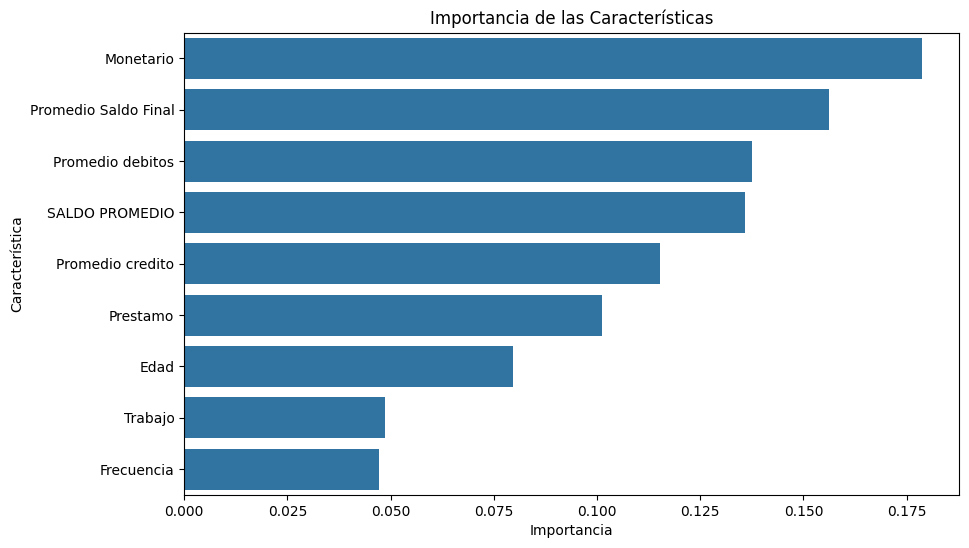

In [401]:
importances = model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(feature_importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()



In [391]:
#Quiere que la frecuencia se centre mas por cliente osea dividir la cantidad de veces que un client paso por los meses de datos que tenemos de cada uno
"""Le gustaria que mi sistema recomiende el valor monetario que tendria una tarjeta, ademas de esto agregar a los datos que le paso, el monto del prestamos, si es que tiene tarjeta la linea de credito
de la tarjeta y tambien cuantos dias de mora tiene un cliente pagando su tarjeta, tambien podria pasarle como dato el promedio de pago minimo que tiene un cliente
basicamente seriviria todo los datos de la hoja de tarjetas y lo mismo con prestamo.
"""

'Le gustaria que mi sistema recomiende el valor monetario que tendria una tarjeta, ademas de esto agregar a los datos que le paso, el monto del prestamos, si es que tiene tarjeta la linea de credito\nde la tarjeta y tambien cuantos dias de mora tiene un cliente pagando su tarjeta, tambien podria pasarle como dato el promedio de pago minimo que tiene un cliente\nbasicamente seriviria todo los datos de la hoja de tarjetas y lo mismo con prestamo.\n'